In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.utils import shuffle as skshuffle
import numpy as np
import torchvision.datasets as dsets
import torchvision.transforms as transforms
from matplotlib import pyplot as plt
import torchvision
import torch.backends.cudnn as cudnn
%matplotlib inline

In [2]:
from model import CNN
from evaluator import ModelEvaluator

In [3]:
cudnn.benchmark = True

In [4]:
trainset = dsets.CIFAR10('./data', train=True, download=True, transform=transforms.ToTensor())
testset = dsets.CIFAR10('./data', train=False, download=True, transform=transforms.ToTensor())
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


In [5]:
# Parameters
n_out = len(classes)
batch_size = 1024

# Hyperparameters
lr = 0.001
epochs = 15

In [6]:
# Data Loader
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True, num_workers=3)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False, num_workers=3)

In [21]:
# Model
l2 = 0.0
pool = 'max'
optim = 'adam'
# Pytorch Cross Entropy Loss
model = CNN(pool)
modeleval = ModelEvaluator(model, epochs, lr, l2=l2, use_gpu=True, optim=optim)
modeleval.evaluator(trainloader, testloader, print_every=100, validation=False)

Train Epoch: 0 [0/50000 (0%)]	 Loss 2.328460
Accuracy of model on test set 47.00
Train Epoch: 1 [0/50000 (0%)]	 Loss 1.427376
Accuracy of model on test set 56.00
Train Epoch: 2 [0/50000 (0%)]	 Loss 1.164055
Accuracy of model on test set 62.00
Train Epoch: 3 [0/50000 (0%)]	 Loss 1.004919
Accuracy of model on test set 66.00
Train Epoch: 4 [0/50000 (0%)]	 Loss 0.867680
Accuracy of model on test set 68.00
Train Epoch: 5 [0/50000 (0%)]	 Loss 0.859333
Accuracy of model on test set 70.00
Train Epoch: 6 [0/50000 (0%)]	 Loss 0.759624
Accuracy of model on test set 70.00
Train Epoch: 7 [0/50000 (0%)]	 Loss 0.813032
Accuracy of model on test set 72.00
Train Epoch: 8 [0/50000 (0%)]	 Loss 0.711553
Accuracy of model on test set 73.00
Train Epoch: 9 [0/50000 (0%)]	 Loss 0.657154
Accuracy of model on test set 74.00
Train Epoch: 10 [0/50000 (0%)]	 Loss 0.663419
Accuracy of model on test set 76.00
Train Epoch: 11 [0/50000 (0%)]	 Loss 0.584074
Accuracy of model on test set 76.00
Train Epoch: 12 [0/50000 (

tensor(76)

# Filter Visualization

In [14]:
from torchvision import utils

In [15]:
def vistensor(tensor, ch=0, nrow=20, padding=1): 
    '''
    https://github.com/pedrodiamel/nettutorial/blob/master/pytorch/pytorch_visualization.ipynb

    ''' 
    
    n,c,w,h = tensor.shape
    if c != 3:
      tensor = tensor.view(n*c,-1,w,h )
      tensor = tensor[:,ch,:,:].unsqueeze(dim=1)
        
    rows = np.min((tensor.shape[0]//nrow + 1, 64 ) )    
    grid = utils.make_grid(tensor, nrow=nrow, normalize=True, padding=padding)
    plt.figure(figsize=(nrow,rows) )
    plt.imshow(grid.cpu().numpy().transpose((1, 2, 0)))

torch.Size([32, 3, 3, 3])


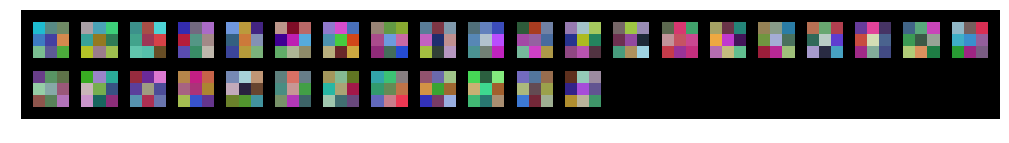

torch.Size([64, 32, 3, 3])


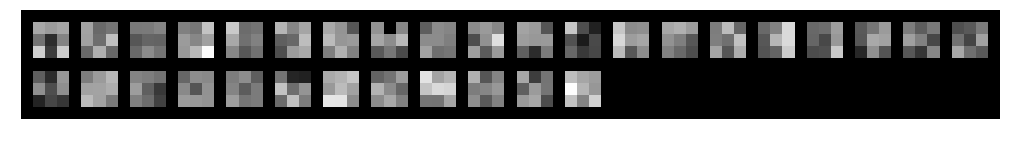

torch.Size([128, 64, 3, 3])


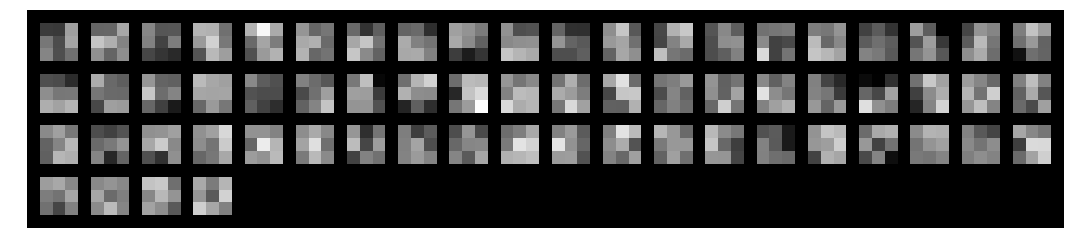

torch.Size([256, 128, 3, 3])


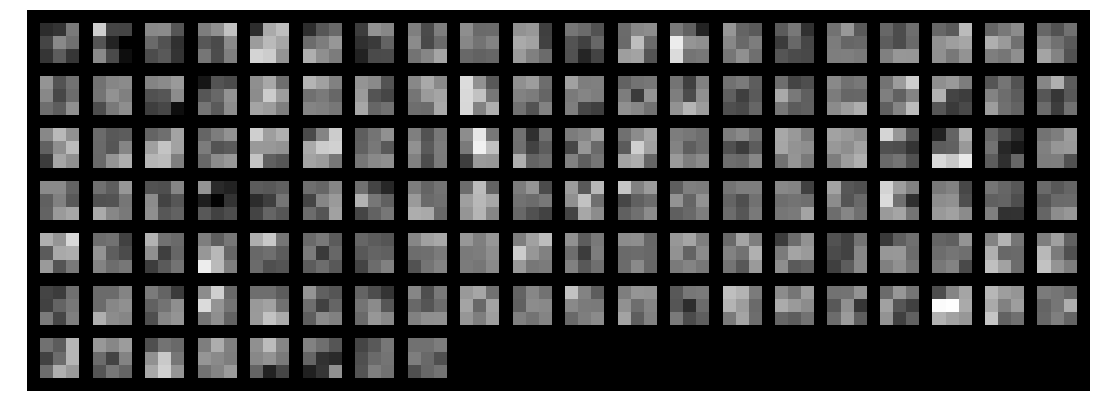

In [17]:
filters = model.modules()
model_layers = [i for i in model.children()]
first_layer = model_layers[0]
second_layer = model_layers[3]
third_layer = model_layers[6]
fourth_layer = model_layers[9]

first_kernels = first_layer.weight.data.clone()
print(first_kernels.shape)
vistensor(first_kernels)
plt.axis('off')
plt.ioff()
plt.show()

second_kernels = second_layer.weight.data.clone()
print(second_kernels.shape)
vistensor(second_kernels[0, ...].reshape(1, 32, 3,3))
plt.axis('off')
plt.ioff()
plt.show()

third_kernels = third_layer.weight.data.clone()
print(third_kernels.shape)
vistensor(third_kernels[0, ...].reshape(1, 64, 3, 3))
plt.axis('off')
plt.ioff()
plt.show()

fourth_kernels = fourth_layer.weight.data.clone()
print(fourth_kernels.shape)
vistensor(fourth_kernels[0, ...].reshape(1, 128, 3, 3))
plt.axis('off')
plt.ioff()
plt.show()

In [16]:
model_layers

[Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)),
 BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True),
 ReLU(),
 Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)),
 BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True),
 ReLU(),
 Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)),
 BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True),
 ReLU(),
 Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)),
 BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True),
 ReLU(),
 MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False),
 Dropout(p=0.3),
 Linear(in_features=4096, out_features=512, bias=True),
 ReLU(),
 Linear(in_features=512, out_features=10, bias=True),
 CrossEntropyLoss()]

## Visualize output of CNN

torch.Size([32, 32, 32])
Output Layer 1


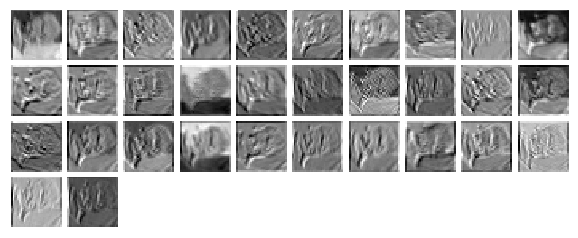

Output Layer 2


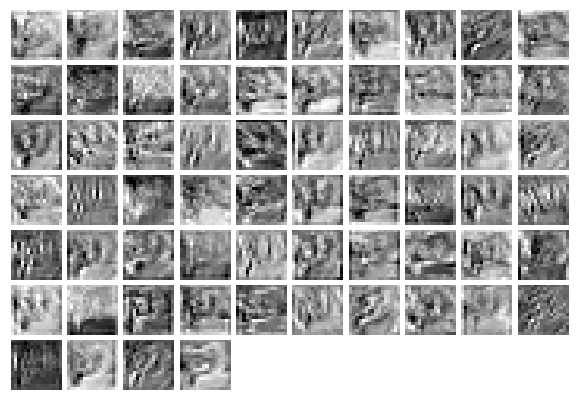

Output Layer 3


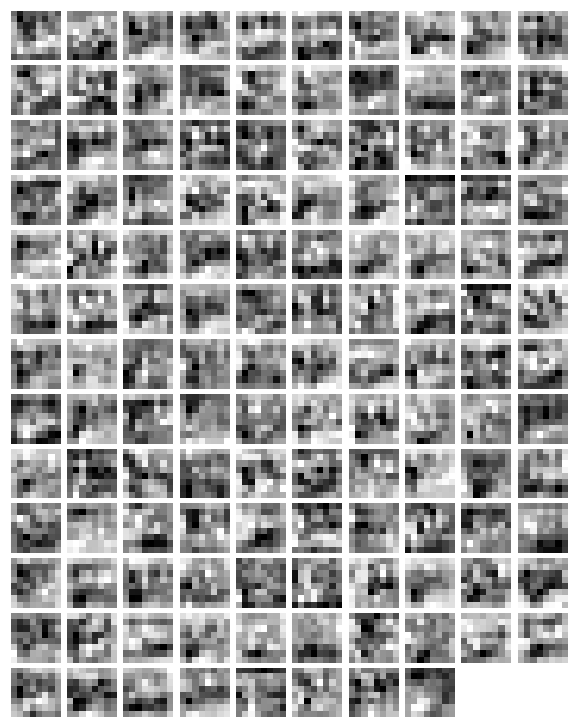

Output Layer 4


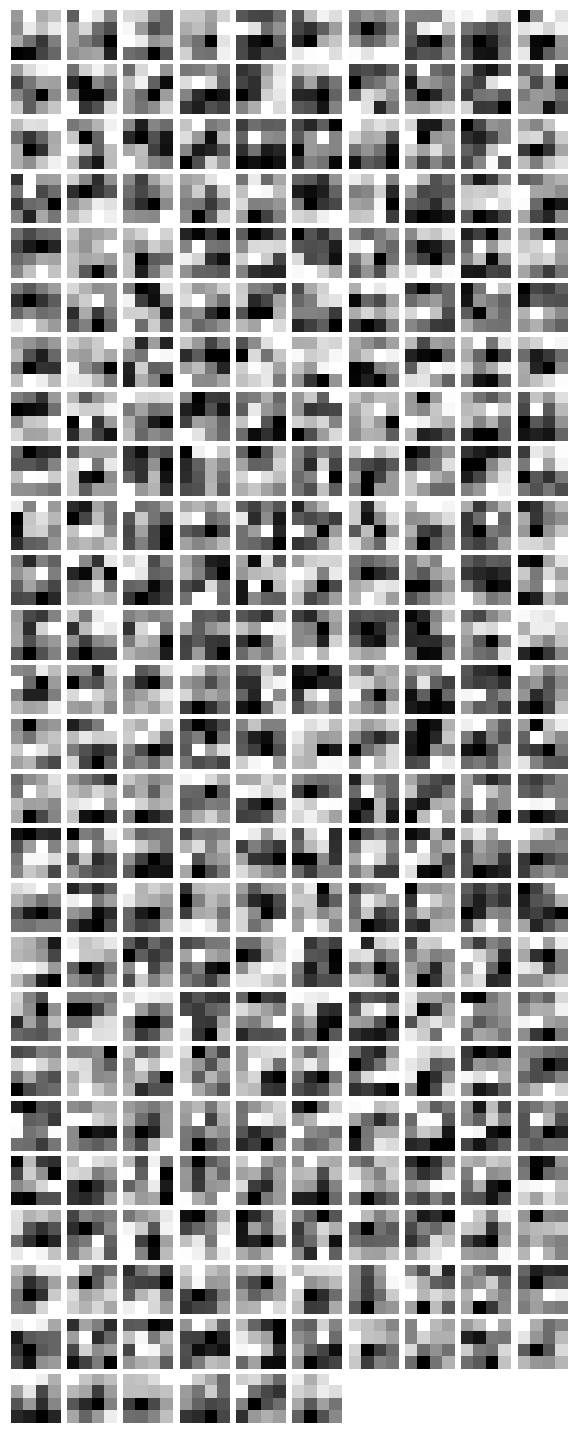

In [12]:
def plot_img(tensor, num_cols=10):
  num_kernels = tensor.shape[0]
  num_rows = 1+ num_kernels // num_cols
  fig = plt.figure(figsize=(num_cols,num_rows))
  for i in range(num_kernels):
    ax1 = fig.add_subplot(num_rows,num_cols,i+1)
    ax1.imshow(tensor[i], cmap='gray')
    ax1.axis('off')
    ax1.set_xticklabels([])
    ax1.set_yticklabels([])

  plt.subplots_adjust(wspace=0.1, hspace=0.1)
  plt.show()    
# get some random training images
dataiter = iter(testloader)
images, labels = dataiter.next()

for image in images[:1]:
    image = image.view(1, 3, 32, 32)
    out = model.cnn1_out(image.to(modeleval.device))
    out = out1.squeeze()
  
    # show images
    print(out.shape)
    print('Output Layer 1')
    plot_img(out.detach().cpu().numpy())
    
    out = model.cnn2_out(image.to(modeleval.device))
    out = out.squeeze()
    print('Output Layer 2')
    plot_img(out.detach().cpu().numpy())
    
    out = model.cnn3_out(image.to(modeleval.device))
    out = out.squeeze()
    print('Output Layer 3')
    plot_img(out.detach().cpu().numpy())
    
    out = model.cnn4_out(image.to(modeleval.device))
    out = out.squeeze()
    print('Output Layer 4')
    plot_img(out.detach().cpu().numpy())

In [22]:
# Model
l2 = 0.0
pool = 'average'
optim = 'adam'
# Pytorch Cross Entropy Loss
model = CNN(pool)
modeleval = ModelEvaluator(model, epochs, lr, l2=l2, use_gpu=True, optim=optim)
modeleval.evaluator(trainloader, testloader, print_every=100, validation=False)

Train Epoch: 0 [0/50000 (0%)]	 Loss 2.306669
Accuracy of model on test set 50.00
Train Epoch: 1 [0/50000 (0%)]	 Loss 1.343997
Accuracy of model on test set 58.00
Train Epoch: 2 [0/50000 (0%)]	 Loss 1.082754
Accuracy of model on test set 63.00
Train Epoch: 3 [0/50000 (0%)]	 Loss 1.032273
Accuracy of model on test set 65.00
Train Epoch: 4 [0/50000 (0%)]	 Loss 0.878460
Accuracy of model on test set 68.00
Train Epoch: 5 [0/50000 (0%)]	 Loss 0.791884
Accuracy of model on test set 70.00
Train Epoch: 6 [0/50000 (0%)]	 Loss 0.792364
Accuracy of model on test set 70.00
Train Epoch: 7 [0/50000 (0%)]	 Loss 0.714006
Accuracy of model on test set 72.00
Train Epoch: 8 [0/50000 (0%)]	 Loss 0.659620
Accuracy of model on test set 73.00
Train Epoch: 9 [0/50000 (0%)]	 Loss 0.639826
Accuracy of model on test set 74.00
Train Epoch: 10 [0/50000 (0%)]	 Loss 0.638521
Accuracy of model on test set 75.00
Train Epoch: 11 [0/50000 (0%)]	 Loss 0.550614
Accuracy of model on test set 75.00
Train Epoch: 12 [0/50000 (

tensor(76)

with current configuration max and average pooling have the same performance.


#### additional model

model with additional convolution layer shows better performance: 81% vs 76%

In [14]:
batch_size = 128
# Data Loader
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True, num_workers=3)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False, num_workers=3)

In [15]:
# Model
l2 = 0.0
pool = 'max'
optim = 'adam'
# Pytorch Cross Entropy Loss
model = CNN(pool)

In [16]:
modeleval = ModelEvaluator(model, epochs, lr, l2=l2, use_gpu=True, optim=optim)
modeleval.evaluator(trainloader, testloader, print_every=100, validation=False)

Train Epoch: 0 [0/50000 (0%)]	 Loss 2.340993
Train Epoch: 0 [12800/50000 (26%)]	 Loss 1.546673
Train Epoch: 0 [25600/50000 (51%)]	 Loss 1.257456
Train Epoch: 0 [38400/50000 (77%)]	 Loss 1.258848
Accuracy of model on test set 57.00
Train Epoch: 1 [0/50000 (0%)]	 Loss 1.130424
Train Epoch: 1 [12800/50000 (26%)]	 Loss 1.055549
Train Epoch: 1 [25600/50000 (51%)]	 Loss 1.123649
Train Epoch: 1 [38400/50000 (77%)]	 Loss 0.854706
Accuracy of model on test set 66.00
Train Epoch: 2 [0/50000 (0%)]	 Loss 0.783152
Train Epoch: 2 [12800/50000 (26%)]	 Loss 0.718566
Train Epoch: 2 [25600/50000 (51%)]	 Loss 0.722348
Train Epoch: 2 [38400/50000 (77%)]	 Loss 0.775164
Accuracy of model on test set 70.00
Train Epoch: 3 [0/50000 (0%)]	 Loss 0.848450
Train Epoch: 3 [12800/50000 (26%)]	 Loss 0.821811
Train Epoch: 3 [25600/50000 (51%)]	 Loss 0.888129
Train Epoch: 3 [38400/50000 (77%)]	 Loss 0.762779
Accuracy of model on test set 73.00
Train Epoch: 4 [0/50000 (0%)]	 Loss 0.663828
Train Epoch: 4 [12800/50000 (26

tensor(81)

In [17]:
filters = model.modules()
model_layers = [i for i in model.children()]
model_layers

[Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)),
 BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True),
 ReLU(),
 Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)),
 BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True),
 ReLU(),
 Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)),
 BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True),
 ReLU(),
 Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)),
 BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True),
 ReLU(),
 Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)),
 BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True),
 ReLU(),
 MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False),
 Dropout(p=0.3),
 Linear(in_features=2048, out_features=512, bias=True),
 ReLU(),
 Linear(in_features=512, out_features=1